<a href="https://colab.research.google.com/github/IlTACK-OH/practical_statistics_for_data_scientists/blob/main/Chpater_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.3.3 예제: 인구에 따른 살인 비율의 추정

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean

In [3]:
from google.colab import files
files.upload();

Saving state.csv to state.csv


In [7]:
state = pd.read_csv('state.csv')
st_mean = state['Population'].mean()
st_tr_mean=trim_mean(state['Population'],0.1) # 0.1은 상위, 하위에서 짤라낼 데이터의 비율을 의미함.
st_median=state['Population'].median()

print('평균: %f\n절사평균:%f\n중앙값:%f'%(st_mean, st_tr_mean,st_median))

평균: 6162876.300000
절사평균:4783697.125000
중앙값:4436369.500000


만약 미국 전체의 평균적인 `살인율`을 계산하려면, 주마다 다른 인구를 고려하기 위해<br> `가중평균`이나 `가중 중간값`을 사용해야 한다.<br>가중평균을 구하기 위해서 넘파이를 사용하고, 가중 중간값을 위해서 `wquantiles`라는 특별한 패키지를 사용할 수 있다.

In [9]:
pip install wquantiles

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import wquantiles

In [13]:
mean_weight = np.average(state['Murder.Rate'], weights=state['Population'])
median_weight = wquantiles.median(state['Murder.Rate'],weights=state['Population'])
print('가중평균:%f\n가중 중간값:%f'%(mean_weight,median_weight))

가중평균:4.445834
가중 중간값:4.400000


# 1.4.3 예제: 주별 인구의 변이 추정

In [28]:
import statsmodels.robust

In [22]:
state = pd.read_csv('state.csv')

In [32]:
sta_std = state['Population'].std()
sta_IQR=state['Population'].quantile(0.75) -state['Population'].quantile(0.25)
sta_MAD = statsmodels.robust.scale.mad(state['Population'])

print("표준편차:%f\n사분위범위(IQR):%f\n중위절대편차(MAD):%f"%(sta_std,sta_IQR,sta_MAD))

표준편차:6848235.347401
사분위범위(IQR):4847308.000000
중위절대편차(MAD):3849876.145998


표준편차는 특잇값에 민감하기 때문에 `MAD`와 거의 두 배나 차이나는 결과가 나온다.

# 1.5.1 백분위수와 상자그림

In [35]:
sta_MR = state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])
sta_MR

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population(millions)')

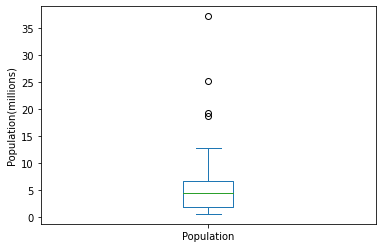

In [37]:
ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Population(millions)')